### Implementing the algorithms
These cells are, thus, required for the execution of all other cells in the notebook

### Bisection

In [76]:
def bisection(f,a,b,maxiter,tol):
    '''
    f: Python function, taking one arg (float) and outputting float/int
    a: float
    b: float
    maxiter: int
    tol: float
    Takes a function f, and tries to find a root of the function in
    the interval [a,b] - subject to the condition that f(a)*f(b) < 0
    '''
    #Pre-evaluating to save some function calls - I estimate 2 calls saved
    fa = f(a)
    fb = f(b)
    if abs(fa) <= tol:
        return a
    elif abs(fb) <= tol:
        return b
    elif fa*fb > 0.0: #The function calls are saved here
        return "Error: Interval has no root, repeated root, or even number of roots!"
    else:
        c = (a+b)/2 #Computing the midpoint
        fc = f(c)
        i = 0 #Holds the number of iterations done
        while abs(fc) > tol:
            if i > maxiter:
                print("Maximum iterations reached! Printing estimated root")
                return c
            if fc*f(a) < 0:
                #Root is in interval [a,c]
                a = a
                b = c
            else:
                #Root is in interval [c,b]
                a = c
                b = b
            c = (a+b)/2
            fc = f(c)
            i += 1
    return c

### Secant

In [77]:
def secant(f, a, b, maxiter, tol):
    '''
    f: Python function. taking one arg (float) and outputting float/int
    a: float
    b: float
    maxiter: int
    tol: float
    Takes a function f, and two guess roots a and b.
    Tries to find the root of the function by approximating f'(x) using
    finite differences, and finding the x intercept of the secant line through
    (a,f(a)) and (b,f(b))
    '''
    #Pre-evaluation saves us atleast 4 function calls here
    fa = f(a)
    fb = f(b)
    if abs(fa) <= tol:
        return a
    elif abs(fb) <= tol:
        return b
    elif abs(fa-fb) < tol: #Two function calls saved here
        return "Error: function is too flat, the method will fail"
    else:
        c = b - fb*((b-a)/(fb-fa)) #Two more function calls saved here
        fc = f(c)
        i = 0
        while abs(fc) > tol:
            if i > maxiter:
                print("Maximum iterations reached! Printing estimated root")
                return c
            a = b
            b = c
            #Again, saving function calls - one is saved in the flatness check
            fb = f(b) #Not evaluating f(a) and saving because that takes space and does NOT save calls
            c = b - fb*((b-a)/(fb-f(a))) #Computing next iterative
            fc = f(c)
            if abs(fc-fb) < tol:
                print("Error: function is too flat at this iteration: Printing last guess!")
                return c
            i += 1
    return c

### Newton-Raphson
Note: I code for a 2 point numerical differentiator mode, as well as a normal mode for use when the analytical form of the derivative is known. This covers all use cases here.

In [82]:
def numDiff(x,f=f,tol=0.0000001):
    '''
    f: Python function, takes one arg (float) and returns a float
        Default value set to f, because that is just convenient for
        this notebook where all root finding targets have the name f
    x: float
        Point at which f' is evaluated
    tol: Step size/tolerance for 2 point numerical derivative calculation
    USES FORWARD DIFF
    '''
    return (f(x+tol)-f(x))/(tol)

def newtonRaphson(f,a,maxiter,tol,df=numDiff):
    '''
    f: Python function, takes one arg (float) and returns a float
    df: Python function, takes one arg (float) and returns a float
    a: float
        Initial guess
    maxiter: int
    tol: float
    '''
    #Pre-evaluation here saves 1 function call
    fa = f(a)
    if abs(fa) < tol:
        return a
    elif abs(df(a)) < tol:
        return "Error: The function is flat at the gues - convergence will fail!"
    else:
        i = 0
        c = a - fa/df(a) #Function call saved here
        while abs(f(c)) > tol:
            if i > maxiter:
                print("Maximum iteration reached! Printing estimated root")
                return c
            a = c
            c = a - f(a)/df(a) #Computing next iterative
            if abs(df(c)) < tol:
                print("Error: Function is too flat at this iteration - printing last iteration guess!")
                return c
            i += 1
    return c

## Q1

In [83]:
from math import cos
def f(x):
    return 3*x - tan(x)
def df(x):
    return 3 - pow(cos(x),-2)

print("The bisection result is -> %.6f "%bisection(f,1,1.4,25,0.000001))
print("The secant result is -> %.6f"%secant(f,1,1.4,25,0.000001))
print("The Newton-Raphson (Analytical) result is -> %.6f"%newtonRaphson(f,1.2,30,0.000001,df=df))
print("The Newton-Raphson (Numerical) result is -> %.6f"%newtonRaphson(f,1.2,30,0.00001,df=numDiff))

The bisection result is -> 1.324194 
The secant result is -> 1.324194
The Newton-Raphson (Analytical) result is -> 1.324194
The Newton-Raphson (Numerical) result is -> 1.324194


## Q2
To find the point of equilibrium, we just solve $ \frac{d V}{d x} = 0 $
using the rootfinding algorithms

In [84]:
#Defining the functions for rootfinding
def f(x):
    return -(4*pow(x,3) + 3*pow(x,2) + 2*x + 1)

def df(x):
    return -(12*pow(x,2) + 6*x + 2)

print("The point of equillibrium is (using Numerical mode)-> %.6f"%newtonRaphson(f,-0.5,30,0.00001,df=numDiff))
print("The point of equillibrium is (using Analytical mode)-> %.6f"%newtonRaphson(f,-0.5,30,0.000001,df=df))

The point of equillibrium is (using Numerical mode)-> -0.605830
The point of equillibrium is (using Analytical mode)-> -0.605830


## Q3
Note, the particle will turn whenever we satisfy the condition,
$$
E = V(x)
$$
Where,

$E$ = Energy of the particle

$V(x)$ = Given potential

As at these points, the total energy of the particle will turn into potential energy - preventing the translation of the particle any further.

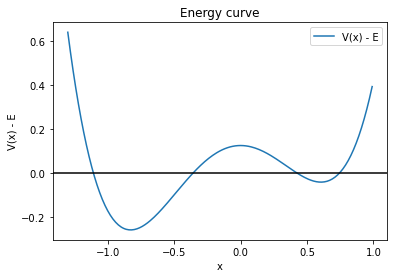

In [85]:
#Defining the functions for rootfinding
def f(x):
    return pow(x,4) + pow((2*x)/3,3) - pow(x,2) + 0.125

def df(x):
    return 4*pow(x,3) + pow((2*x)/3,2)*2 - 2*x

import matplotlib.pyplot as plt

x = [i/100 for i in range(-130,100)]
y = [f(i) for i in x]

plt.plot(x,y,label="V(x) - E")
plt.axhline(color='black')
plt.title("Energy curve")
plt.xlabel("x")
plt.ylabel("V(x) - E")
plt.legend()
plt.show()

### Part (a)

In [86]:
print("Using bisection!")
print("Turning points in right well ->")
print("1 -> %.5f"%bisection(f,0.5,1,20,0.000001))
print("2 -> %.5f"%bisection(f,0.1,0.5,20,0.000001))
print("Turning points in the left well ->")
print("1 -> %.5f"%bisection(f,-0.5,-0.1,20,0.000001))
print("2 -> %.5f"%bisection(f,-1.5,-1,20,0.000001))

Using bisection!
Turning points in right well ->
1 -> 0.74417
2 -> 0.42433
Turning points in the left well ->
1 -> -0.35749
2 -> -1.10732


In [87]:
print("Using secant!")
print("Turning points in right well ->")
print("1 -> %.5f"%secant(f,0.8,0.9,20,0.000001))
print("2 -> %.5f"%secant(f,0.2,0.3,20,0.000001))
print("Turning points in the left well ->")
print("1 -> %.5f"%secant(f,-0.6,-0.5,20,0.000001))
print("2 -> %.5f"%secant(f,-1.5,-1,20,0.000001))

Using secant!
Turning points in right well ->
1 -> 0.74417
2 -> 0.42434
Turning points in the left well ->
1 -> -0.35748
2 -> -1.10732


### Additional Error
Note that, the tolerance set in the algorithms in this question have a value that is one order of magnitude smaller than the maxmimum error asked for the question in the value of x. This is ensured because internally the algorithms stop based on error in Energy, not x. The error in f(x) is a looser bound than x relative error, so this ensures the required error bounds required.

- Diptanuj Sarkar (22MS038)